In [1]:
import pandas as pd
import numpy as np
import statistics as st

# Ordenar Base

In [2]:
df = pd.DataFrame({
    'X' : [25,25,25,37,37,37,45,45,54,2,2],
    'Y' : [4,7,12,56,26,78,94,23,56,34,800],
})

* Ordenar por uma variável, destacada em "by"

In [3]:
df.sort_values(by='X', ascending=False,inplace = True)

In [4]:
df.head()

,X,Y
8,54,56
6,45,94
7,45,23
3,37,56
4,37,26


* Ordenar por duas variáveis, podendo ajustar a ordem, ascendente ou descendente, para cada uma

In [5]:
df.sort_values(['X', 'Y'], ascending=[True, False], inplace = True)

In [6]:
df.head()

,X,Y
10,2,800
9,2,34
2,25,12
1,25,7
0,25,4


# Tratamento de nulos/vazios

In [7]:
asdf = pd.Series([1, np.nan, 4, 5, 7, 12, np.nan, np.nan])

In [8]:
asdf.head()

0    1.0
1    NaN
2    4.0
3    5.0
4    7.0
dtype: float64

* Dropar observações NaN

In [9]:
asdf.dropna()

0     1.0
2     4.0
3     5.0
4     7.0
5    12.0
dtype: float64

In [10]:
asdf[asdf.notnull()]

0     1.0
2     4.0
3     5.0
4     7.0
5    12.0
dtype: float64

In [11]:
txs2 = pd.DataFrame({
    'X' : [1,np.nan,2,12,np.nan],
    'Y' : [4,3,2,np.nan,np.nan],
    'Z' : [2,np.nan,np.nan,np.nan,np.nan],
    'W' : [np.nan,np.nan,np.nan,np.nan,np.nan]
})

In [12]:
txs2.head()

,X,Y,Z,W
0,1.0,4.0,2.0,NaN
1,NaN,3.0,NaN,NaN
2,2.0,2.0,NaN,NaN
3,12.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


* Descarta qualquer linha com NaN

In [13]:
txs2.dropna()

,X,Y,Z,W


* Descarta linhas que só possuem NaN

In [14]:
txs2.dropna(how='all')

,X,Y,Z,W
0,1.0,4.0,2.0,NaN
1,NaN,3.0,NaN,NaN
2,2.0,2.0,NaN,NaN
3,12.0,NaN,NaN,NaN


* Descarta colunas que só possuem NaN 

In [15]:
txs2.dropna(axis=1, how='all') #deleta colunas que so possuem vazio

,X,Y,Z
0,1.0,4.0,2.0
1,NaN,3.0,NaN
2,2.0,2.0,NaN
3,12.0,NaN,NaN
4,NaN,NaN,NaN


In [16]:
txs2 = pd.DataFrame({
    'X' : [1,np.nan,2,12,np.nan],
    'Y' : [4,3,2,np.nan,np.nan],
    'Z' : [2,np.nan,4,np.nan,np.nan],
    'W' : [5,np.nan,9,np.nan,np.nan]
})
txs2

,X,Y,Z,W
0,1.0,4.0,2.0,5.0
1,NaN,3.0,NaN,NaN
2,2.0,2.0,4.0,9.0
3,12.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


* Mantem linhas que possuem 04 observações não nulas

In [17]:
txs2.dropna(thresh=4)

,X,Y,Z,W
0,1.0,4.0,2.0,5.0
2,2.0,2.0,4.0,9.0


* Substitui os NaN por valores especificos em cada coluna

In [18]:
txs2.fillna({'X' : 0.5,'Y' : 2, 'Z' : 0.4, 'W' : 12}) 

,X,Y,Z,W
0,1.0,4.0,2.0,5.0
1,0.5,3.0,0.4,12.0
2,2.0,2.0,4.0,9.0
3,12.0,2.0,0.4,12.0
4,0.5,2.0,0.4,12.0


* Preenche os NaN da coluna especificada pela média e mediana da mesma, respectivamente

In [19]:
txs2['X'].fillna(txs2['X'].mean()) # média

0     1.0
1     5.0
2     2.0
3    12.0
4     5.0
Name: X, dtype: float64

In [20]:
txs2['X'].fillna(txs2['X'].median()) # mediana

0     1.0
1     2.0
2     2.0
3    12.0
4     2.0
Name: X, dtype: float64

# Tratamento Duplicados

In [21]:
txs2 = pd.DataFrame({
    'X' : ['A','A','B','C'],
    'Y' : ['A','A','B','C'],
    'Z' : ['A','A','C','A'],
})
txs2

,X,Y,Z
0,A,A,A
1,A,A,A
2,B,B,C
3,C,C,A


* Verifica linhas duplicadas

In [22]:
txs2.duplicated() #linha 1 é copia da 0

0    False
1     True
2    False
3    False
dtype: bool

* Deleta linhas duplicadas, a primeira que encontrar

In [23]:
txs2.drop_duplicates()

,X,Y,Z
0,A,A,A
2,B,B,C
3,C,C,A


* Remove as linhas duplicadas de uma coluna especifica

In [24]:
txs2.drop_duplicates(['Z'])

,X,Y,Z
0,A,A,A
2,B,B,C


# Tratamento Valores Discrepantes

In [25]:
txs2 = pd.DataFrame({
    'X' : [25,32,3,7,8,12,34,1200,54,34,67],
    'Y' : [4,7,12,56,26,78,94,23,56,34,800],
})

* Mostra linhas com valor da coluna maior que determinado numero

In [26]:
txs2[txs2['X']>600]

,X,Y
7,1200,23


* Remove linhas maior que determinado valor

In [27]:
df.drop(df[df.X>30].index ,inplace=True)

* Substitui o valor que cumpre a condição pela mediana da coluna

In [28]:
txs2['X'][txs2['X']>600] = st.median(txs2['X'])

# Engenharia de Variáveis

* Convertendo tipo de dado, primeiro para inteiro e, na sequência, para string 

In [29]:
df.X = df.X.astype('int64')
df.Y = df.Y.astype('str')

In [30]:
txs2 = pd.DataFrame({
    'X' : ['A','B','C','D','E','F','G'],
    'Y' : [1,2,3,4,5,6,7],
})
txs2

,X,Y
0,A,1
1,B,2
2,C,3
3,D,4
4,E,5
5,F,6
6,G,7


* Associaçao de Colunas

In [31]:
ass = {
    'A' : 'BR',
    'B' : 'BR',
    'C' : 'ARG',
    'D' : 'ARG',
    'E' : 'BR',
    'F' : 'ENG',
    'G' : 'ENG',
}

In [32]:
txs2['cat'] = txs2['X'].map(ass) #adicionar uma coluna nova com uma correspondencia
txs2

,X,Y,cat
0,A,1,BR
1,B,2,BR
2,C,3,ARG
3,D,4,ARG
4,E,5,BR
5,F,6,ENG
6,G,7,ENG


In [33]:
txs2.replace(['BR','ENG'], ['DFS', 'DEN'], inplace = True) #substitui os valores das listas, na ordem

In [34]:
txs2.replace(['BR','ENG'], ['DFS', 'DEN'])

,X,Y,cat
0,A,1,DFS
1,B,2,DFS
2,C,3,ARG
3,D,4,ARG
4,E,5,DFS
5,F,6,DEN
6,G,7,DEN


In [35]:
df = pd.DataFrame({
    'X' : [25,25,25,37,37,37,45,45,54,2,2,30,30,30,30,30,30,30,53,57,666,44,45,434],
    'Y' : [4,7,12,56,26,78,94,23,56,34,800,56,76,35,78,46,78,56,44,45,434,244,4246,60],
})

* Nova coluna relacionada numericamente

In [36]:
df['A'] = (df['Y'] * 20)

In [37]:
df.head()

,X,Y,A
0,25,4,80
1,25,7,140
2,25,12,240
3,37,56,1120
4,37,26,520


* Função para categorização de dados

In [38]:
def categoriza(s):
    if s >= 50:
        return 'X'
    elif s >= 30:
        return 'Y'
    elif s >= 15:
        return 'Z'
    else:
        return 'V'

In [39]:
#Aplicando a funcao acima
df['categoria_cat'] = df['X'].apply(categoriza)

In [40]:
df.head()

,X,Y,A,categoria_cat
0,25,4,80,Z
1,25,7,140,Z
2,25,12,240,Z
3,37,56,1120,Y
4,37,26,520,Y


* Função para categorização de dados com dois retornos

In [41]:
def categoriza_2(s):
    if s >= 50:
        return 'X','A'
    elif s >= 30:
        return 'Y','A'
    elif s >= 15:
        return 'Z','A'
    else:
        return 'C','D'

In [42]:
#Criando uma coluna para cada retorno
df['categoria_cat1'], df['categoria_cat2'] = zip(*df['X'].map(categoriza_2))

In [43]:
df.head()

,X,Y,A,categoria_cat,categoria_cat1,categoria_cat2
0,25,4,80,Z,Z,A
1,25,7,140,Z,Z,A
2,25,12,240,Z,Z,A
3,37,56,1120,Y,Y,A
4,37,26,520,Y,Y,A


* Função para categorização de dados com duas condições e dois retornos

In [44]:
def categoriza_3(s, x):
    if s >= 50 or x <50:
        return '0','1'
    elif s >= 30 or x>=20:
        return '2','3'
    elif s >= 15 or x>30:
        return '4','5'
    else:
        return '6','7'

In [45]:
#Criando duas colunas empregando as colunas das condições
df['categoria_cat3'], df['categoria_cat4'] = zip(*df.apply(lambda x: categoriza_3(x.X, x.Y), axis=1))

In [46]:
df.head()

,X,Y,A,categoria_cat,categoria_cat1,categoria_cat2,categoria_cat3,categoria_cat4
0,25,4,80,Z,Z,A,0,1
1,25,7,140,Z,Z,A,0,1
2,25,12,240,Z,Z,A,0,1
3,37,56,1120,Y,Y,A,2,3
4,37,26,520,Y,Y,A,0,1


* Criando categorias a partir de uma condição

In [47]:
df['X'] = np.where(df['X'] < 20, 'A', 'B')

In [48]:
df.head()

,X,Y,A,categoria_cat,categoria_cat1,categoria_cat2,categoria_cat3,categoria_cat4
0,B,4,80,Z,Z,A,0,1
1,B,7,140,Z,Z,A,0,1
2,B,12,240,Z,Z,A,0,1
3,B,56,1120,Y,Y,A,2,3
4,B,26,520,Y,Y,A,0,1


* Tornar valores de uma determinada frequência como categorias outros

In [49]:
freq = df['X'].value_counts(normalize=True) #mostra as frequencias de cada categoria
print(freq)
pequenas_freq = freq[freq<0.1].index #seleciona categorias com frequencias menor que 10%

B    0.916667
A    0.083333
Name: X, dtype: float64


In [50]:
df['X'] = df['X'].replace(pequenas_freq, 'Outros') #substitui as categorias acima por 'Outros'

In [51]:
df.head(14)

,X,Y,A,categoria_cat,categoria_cat1,categoria_cat2,categoria_cat3,categoria_cat4
0,B,4,80,Z,Z,A,0,1
1,B,7,140,Z,Z,A,0,1
2,B,12,240,Z,Z,A,0,1
3,B,56,1120,Y,Y,A,2,3
4,B,26,520,Y,Y,A,0,1
5,B,78,1560,Y,Y,A,2,3
6,B,94,1880,Y,Y,A,2,3
7,B,23,460,Y,Y,A,0,1
8,B,56,1120,X,X,A,0,1
9,Outros,34,680,V,C,D,0,1


* Calculo de diferença entre linhas

In [52]:
#Diferenca de uma linha em relacao a anterior
df['X'] = df.Y.diff()
#Diferenca percentual
df['X Percentual'] = df.Y.pct_change()*100

In [53]:
df.head()

,X,Y,A,categoria_cat,categoria_cat1,categoria_cat2,categoria_cat3,categoria_cat4,X Percentual
0,NaN,4,80,Z,Z,A,0,1,NaN
1,3.0,7,140,Z,Z,A,0,1,75.000000
2,5.0,12,240,Z,Z,A,0,1,71.428571
3,44.0,56,1120,Y,Y,A,2,3,366.666667
4,-30.0,26,520,Y,Y,A,0,1,-53.571429


* Soma acumulada agrupada

In [54]:
df['soma_agrupada'] = df.groupby('categoria_cat').Y.cumsum() 
#Y é a variavel quantitativa a ser somada pela variável categoria_cat

In [55]:
df.head()

,X,Y,A,categoria_cat,categoria_cat1,categoria_cat2,categoria_cat3,categoria_cat4,X Percentual,soma_agrupada
0,NaN,4,80,Z,Z,A,0,1,NaN,4
1,3.0,7,140,Z,Z,A,0,1,75.000000,11
2,5.0,12,240,Z,Z,A,0,1,71.428571,23
3,44.0,56,1120,Y,Y,A,2,3,366.666667,56
4,-30.0,26,520,Y,Y,A,0,1,-53.571429,82


* Contagem de frequencia por colunas

In [56]:
df['contagem_x'] = df.groupby('categoria_cat1').cumcount() + 1
df['contagem_x_e_y'] = df.groupby(['categoria_cat1','categoria_cat3']).cumcount() + 1

In [57]:
df.head()

,X,Y,A,categoria_cat,categoria_cat1,categoria_cat2,categoria_cat3,categoria_cat4,X Percentual,soma_agrupada,contagem_x,contagem_x_e_y
0,NaN,4,80,Z,Z,A,0,1,NaN,4,1,1
1,3.0,7,140,Z,Z,A,0,1,75.000000,11,2,2
2,5.0,12,240,Z,Z,A,0,1,71.428571,23,3,3
3,44.0,56,1120,Y,Y,A,2,3,366.666667,56,1,1
4,-30.0,26,520,Y,Y,A,0,1,-53.571429,82,2,1


* Criando classes de variavel quantitativa

In [58]:
x = [3,5,7,8,20,25,30,100,120,6,8,9,12,11,50,45,67,23,98,120,34,45,25,65]

In [59]:
categorias = [2,29,39,55,140] #limites das classes criadas

In [60]:
y = pd.cut(x,categorias) #divide o objeto x nas categorias passadas acima
y.categories #diz as categorias criadas

IntervalIndex([(2, 29], (29, 39], (39, 55], (55, 140]],
              closed='right',
              dtype='interval[int64]')

In [61]:
nome_categorias = ['PrimeiraCat', 'SegundaCat', 'TerceiraCat', 'QuartaCat'] #nomea as categorias

In [62]:
y = pd.cut(x, categorias, labels = nome_categorias) #coloca nome nos intervalos criados (categorias)
y

['PrimeiraCat', 'PrimeiraCat', 'PrimeiraCat', 'PrimeiraCat', 'PrimeiraCat', ..., 'QuartaCat', 'SegundaCat', 'TerceiraCat', 'PrimeiraCat', 'QuartaCat']
Length: 24
Categories (4, object): ['PrimeiraCat' < 'SegundaCat' < 'TerceiraCat' < 'QuartaCat']

In [63]:
y = pd.cut(x, 4, precision=3) #divide em 4 categorias de mesma amplitude, com ate 3 casas decimais
y

[(2.883, 32.25], (2.883, 32.25], (2.883, 32.25], (2.883, 32.25], (2.883, 32.25], ..., (90.75, 120.0], (32.25, 61.5], (32.25, 61.5], (2.883, 32.25], (61.5, 90.75]]
Length: 24
Categories (4, interval[float64]): [(2.883, 32.25] < (32.25, 61.5] < (61.5, 90.75] < (90.75, 120.0]]

In [64]:
y = pd.cut(x, np.arange(0,140,10)) # indicando o inicio, fim e range das classes
y

[(0, 10], (0, 10], (0, 10], (0, 10], (10, 20], ..., (110, 120], (30, 40], (40, 50], (20, 30], (60, 70]]
Length: 24
Categories (13, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (90, 100] < (100, 110] < (110, 120] < (120, 130]]

In [65]:
y = pd.qcut(x,4) #qcut divide em quantis e, neste caso, em 4
y

[(2.999, 8.75], (2.999, 8.75], (2.999, 8.75], (2.999, 8.75], (8.75, 25.0], ..., (53.75, 120.0], (25.0, 53.75], (25.0, 53.75], (8.75, 25.0], (53.75, 120.0]]
Length: 24
Categories (4, interval[float64]): [(2.999, 8.75] < (8.75, 25.0] < (25.0, 53.75] < (53.75, 120.0]]

In [66]:
y = pd.qcut(x,[0, 0.2,0.5,0.8,1]) #podemos passar os quantis desejados
y

[(2.999, 8.0], (2.999, 8.0], (2.999, 8.0], (2.999, 8.0], (8.0, 25.0], ..., (65.8, 120.0], (25.0, 65.8], (25.0, 65.8], (8.0, 25.0], (25.0, 65.8]]
Length: 24
Categories (4, interval[float64]): [(2.999, 8.0] < (8.0, 25.0] < (25.0, 65.8] < (65.8, 120.0]]

* Escalando variaveis

In [67]:
pokemon = pd.read_csv('pokemon.csv')

In [68]:
pokemon2 = pokemon[['attack']]

In [69]:
pokemon2.head()

,attack
0,49
1,62
2,100
3,52
4,64


In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
# Standard Scaler - transforma a variavel para média = 0 e desvio-padrao = 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pokemon2[['attack']]) # aprendendo a transformacao nos dados do conjunto
pokemon2['attack_escal'] = scaler.transform(pokemon2[['attack']]) # aplicando a transformacao

C:\Users\gcabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [72]:
pokemon2.head()

,attack,attack_escal
0,49,-0.897909
1,62,-0.493413
2,100,0.688960
3,52,-0.804564
4,64,-0.431183


In [73]:
# Robust Scaler - transforma a variavel para mediana = 0 e intervalo interquartil = 1 . Metodo + robusto a outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(pokemon2[['attack']]) # aprendendo a transformacao nos dados do conjunto
pokemon2['attack_escal2'] = scaler.transform(pokemon2[['attack']]) # aplicando a transformacao

C:\Users\gcabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [74]:
pokemon2.head()

,attack,attack_escal,attack_escal2
0,49,-0.897909,-0.577778
1,62,-0.493413,-0.288889
2,100,0.688960,0.555556
3,52,-0.804564,-0.511111
4,64,-0.431183,-0.244444


In [75]:
# Quantile Transform - Uniforme. Transforma a variavel em uma distribuicao uniforme (altera a distribuicao original)
# Esta distribuicao deixa os valores da variaveis igualmente espaçados
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution="uniform")
scaler.fit(pokemon2[['attack']]) # aprendendo a transformacao nos dados do conjunto
pokemon2['attack_escal3'] = scaler.transform(pokemon2[['attack']]) # aplicando a transformacao

C:\Users\gcabr\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2347: UserWarning: n_quantiles (1000) is greater than the total number of samples (801). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\gcabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
pokemon2.head()

,attack,attack_escal,attack_escal2,attack_escal3
0,49,-0.897909,-0.577778,0.173750
1,62,-0.493413,-0.288889,0.348750
2,100,0.688960,0.555556,0.765625
3,52,-0.804564,-0.511111,0.225625
4,64,-0.431183,-0.244444,0.364375


* Comparando a distribuicao das tranformacoes

<AxesSubplot:ylabel='Frequency'>

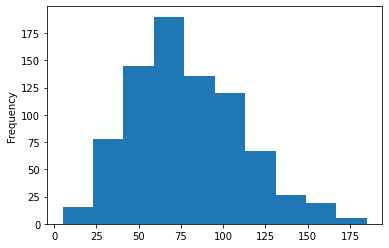

In [77]:
# Original
pokemon2['attack'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

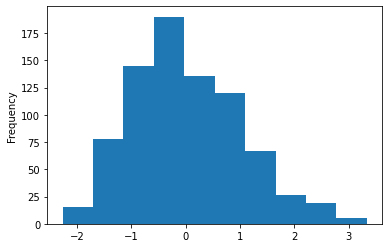

In [78]:
# Standard Scale
pokemon2['attack_escal'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

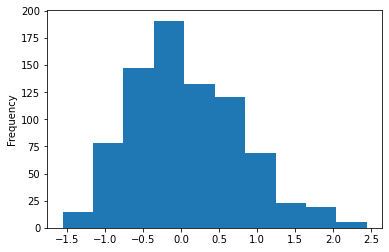

In [79]:
# Robust Scale (encurtou os valores da distribuicao)
pokemon2['attack_escal2'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

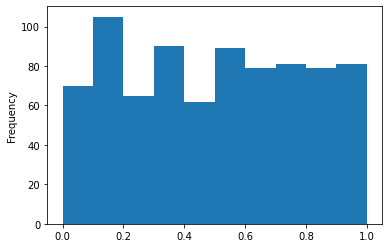

In [80]:
# Quantile Uniforme (mudou o formato da distribuicao, deixando aproximadamente uniforme)
pokemon2['attack_escal3'].plot.hist()

* Enconding de variaveis qualitativas

In [81]:
pokemon3 = pokemon[['type1']]

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
encode = {}
drop = {}
encode['type1'] = OneHotEncoder(sparse=False, drop='first') # criando o enconding, dropando a primeira coluna
encode['type1'].fit(pokemon3[['type1']]) # criando o enconding na base
drop['type1'] = encode['type1'].categories_[0][0] #salva a coluna que foi dropada
new_cols = [f'type1_{cat}' for cat in encode['type1'].categories_[0][1:]] # adiciona o prefixo da coluna, mantendo o rastreamento
apoio = pd.DataFrame(encode['type1'].transform(pokemon3[['type1']]), index=pokemon3.index, columns=new_cols) #criando um dataframe com as colunas criadas
pokemon3 = pokemon3.drop('type1',axis=1) #dropando a coluna original
pokemon3 = pokemon3.join(apoio) # adicionando as novas colunas na base

In [84]:
pokemon3.head()

,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
drop #vendo a coluna dropada

{'type1': 'bug'}

* Enconding de variáveis quanti

In [86]:
pokemon2 = pokemon[['attack']]

In [87]:
from sklearn.preprocessing import KBinsDiscretizer

In [88]:
#A variavel sera dividida em 06 categorias, com a mesma quantidade de pontos (quantile), sendo uma coluna para cada (onehot-dense)
scaler = KBinsDiscretizer(n_bins=6,encode='onehot-dense',strategy='quantile')
scaler.fit(pokemon2[['attack']])
    
#insere a nova coluna com a identificaçao de qual era a variavel original e qual o inicio da categoria
novas_colunas = []
for comeco in scaler.bin_edges_[0][:-1]:
    novas_colunas.append(f'attack_' + str(comeco))
        
# colocando as novas colunas na base, e dropando a variavel original
pokemon2 = pokemon2.join( pd.DataFrame(scaler.transform(pokemon2[['attack']]),columns=novas_colunas,index=pokemon2.index) ) 
pokemon2 = pokemon2.drop('attack',axis=1)

In [89]:
pokemon2.head()

,attack_5.0,attack_48.0,attack_60.0,attack_75.0,attack_90.0,attack_109.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [90]:
pokemon2 = pokemon[['attack']]
#A variavel sera dividida em 06 categorias, com a mesma amplitude (quantile)
scaler = KBinsDiscretizer(n_bins=6,encode='onehot-dense',strategy='uniform')
scaler.fit(pokemon2[['attack']])
novas_colunas = []
for comeco in scaler.bin_edges_[0][:-1]:
    novas_colunas.append(f'attack_' + str(comeco))
pokemon2 = pokemon2.join( pd.DataFrame(scaler.transform(pokemon2[['attack']]),columns=novas_colunas,index=pokemon2.index) ) 
pokemon2 = pokemon2.drop('attack',axis=1)
pokemon2.head()

,attack_5.0,attack_35.0,attack_65.0,attack_95.0,attack_125.0,attack_155.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [91]:
pokemon2 = pokemon[['attack']]
#A variavel sera dividida em 06 categorias, usando o algoritmo kmeans, ou seja, buscando regiões mais densas
scaler = KBinsDiscretizer(n_bins=6,encode='onehot-dense',strategy='kmeans')
scaler.fit(pokemon2[['attack']])
novas_colunas = []
for comeco in scaler.bin_edges_[0][:-1]:
    novas_colunas.append(f'attack_' + str(comeco))
pokemon2 = pokemon2.join( pd.DataFrame(scaler.transform(pokemon2[['attack']]),columns=novas_colunas,index=pokemon2.index) ) 
pokemon2 = pokemon2.drop('attack',axis=1)
pokemon2.head()

,attack_5.0,attack_43.49235395189011,attack_67.44166666666669,attack_90.09848484848487,attack_113.22445384073298,attack_141.65930232558145
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [92]:
pokemon2 = pokemon[['attack']]
#As categorias criadas para a variavel sao transformadas em numeros inteiros (enconde = ordinal), ordenadas pela grandeza 
scaler = KBinsDiscretizer(n_bins=6,encode='ordinal',strategy='kmeans')
scaler.fit(pokemon2[['attack']])
pokemon2['attack_enc'] = scaler.transform(pokemon2[['attack']])
pokemon2.head()

C:\Users\gcabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,attack,attack_enc
0,49,1.0
1,62,1.0
2,100,3.0
3,52,1.0
4,64,1.0


In [93]:
# Faixas criadas: a) de 5 até 43.4 = 0 ; b) de 43,4 até 67.4 = 1 ; c) de 67.4 até 90 = 2 etc
scaler.bin_edges_

array([array([  5.        ,  43.49235395,  67.44166667,  90.09848485,
       113.22445384, 141.65930233, 185.        ])], dtype=object)

# Amostragem

* Amostra aleatoria simples
    * Todas as observações tem igual probabilidade de serem selecionados*

In [94]:
txs2 = pd.DataFrame({
    'X' : ['A','B','C','D','E','F','G'],
    'Y' : [1,2,3,4,5,6,7],
})

In [95]:
txs2.sample(n=3) #pega uma amostra de 3 linhas - sem reposição, obs: poderia-se usar o parametro frac = x, em que x seria 
# uma fracao da base

,X,Y
1,B,2
4,E,5
6,G,7


In [96]:
txs2.sample(n=6,replace=True) #pega uma amostra de 6 linhas - com reposição

,X,Y
4,E,5
2,C,3
1,B,2
4,E,5
4,E,5
5,F,6


* Amostragem Estratificada
    * Extrai observações proporcionalmente ao tamanho de grupos existentes dentro do universo

In [97]:
pokemon = pd.read_csv('pokemon.csv')

In [98]:
pokemon.shape

(801, 41)

In [99]:
pd.value_counts(pokemon['type1']) #grupos que segmentam o universo e seus respectivos tamanhos

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
n_amostral = 200 #tamanho da amostra

In [102]:
classe = pokemon['type1'].unique() #diferentes grupos

In [103]:
n_por_classe = round(n_amostral/len(classe)) #proporcao de cada amostra por grupo

In [104]:
# a proporcao amostral por classe é proporcional a frequencia de cada categoria
amostras_por_classe = []
for x in classe:
    index = pokemon['type1'] == x
    obs_c = pokemon[index]
    proporcao_c = len(obs_c) / len(pokemon)
    qtde_c = round(proporcao_c * n_amostral)
    amostra_c = obs_c.sample(qtde_c)
    amostras_por_classe.append(amostra_c)
amostra_estratificada = pd.concat(amostras_por_classe)

In [105]:
amostra_estratificada.shape

(199, 41)

In [106]:
pokemon = pokemon.reset_index()

In [107]:
pokemon.head()

,index,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
